# Pymaceuticals Inc.
---

### Analysis

- Within the study of tumor shrinking regimens, this trail concludes that Capomulin was the most success at reducing the tumors assocaiated with squamous cell carcinoma. The second most performative drug was Ramicane. In a specific subject, mouse m957, they had a 46 mm3 tumor on day 10 of treatment, but shrunk the tumor down to 32.5 mm3 by day 35. While the tumor size rebound by around 1.5 mm3 by the trail end,longer studies of this medication should be pursued. 
Capomulin has shown to be affective towards both male and female mice, and mice of all weight and tumor sizes.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data\Mouse_metadata.csv"
study_results_path = "Data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousey_df=pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mousey_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
mice_count=len(mouse_metadata["Mouse ID"].unique())
mice_count

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplies=mousey_df[mousey_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplies

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID.
duplies=mousey_df.loc[mousey_df["Mouse ID"].isin(duplies)]
duplies

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ratatouille_df=mousey_df.drop(index=duplies.index)
ratatouille_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice in the clean DataFrame.
no_mice_in_the_kitchen=len(ratatouille_df['Mouse ID'].unique())
no_mice_in_the_kitchen

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#gordo is one of the names of the 3 blind mice in Shrek
gordo= ratatouille_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
three_blind_mice= pd.DataFrame({
    "Mean Tumor Volume": gordo.mean(),
    "Median Tumor Volume":gordo.median(),
    "Tumor Volume Variance":gordo.var(),
    "Tumor Volume Std. Dev.":gordo.std(),
    "Tumor Volume Std. Err.":gordo.sem()
})
three_blind_mice

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stuart_little_df= ratatouille_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Var='var',
    Std='std',
    Sem='sem'
)
stuart_little_df.columns=pd.MultiIndex.from_tuples([("Tumor Volume(mm3)", col)for col in stuart_little_df.columns])
stuart_little_df


Tumor Volume(mm3)                                          
                          Mean     Median        Var       Std       Sem
Drug Regimen                                                            
Capomulin            40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin             52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol            52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril             55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol             54.331565  52.509285  66.173479  8.134708  0.596466
Placebo              54.033581  52.288934  61.168083  7.821003  0.581331
Propriva             52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane             40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn             54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol            53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

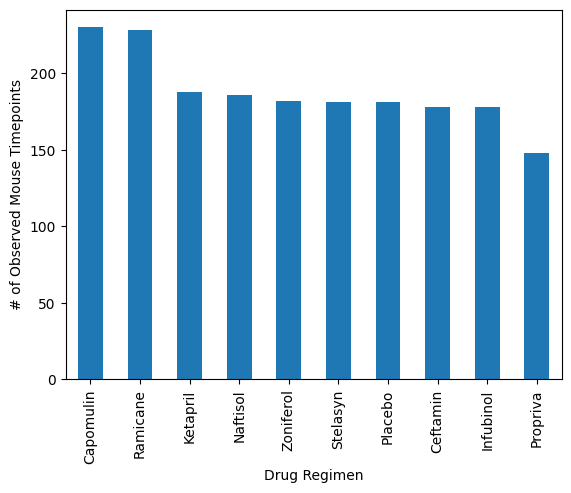

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
meds=ratatouille_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
meds.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

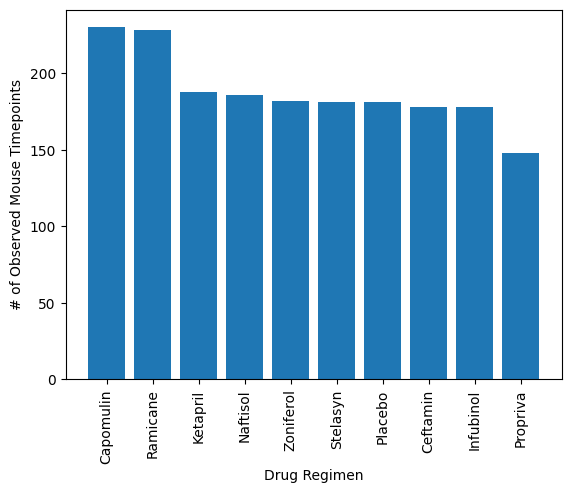

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(meds.index,meds.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Count'>

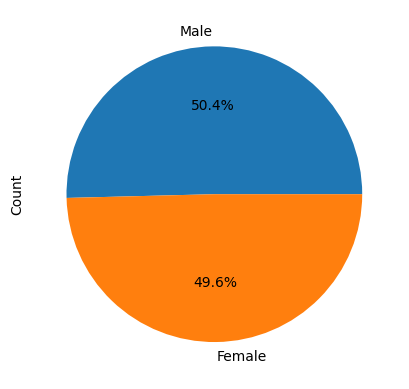

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique=ratatouille_df[['Sex', 'Mouse ID']].drop_duplicates()
gender=unique['Sex'].value_counts()
# Make the pie chart
gender.plot(kind='pie',ylabel="Count", autopct='%1.1f%%')

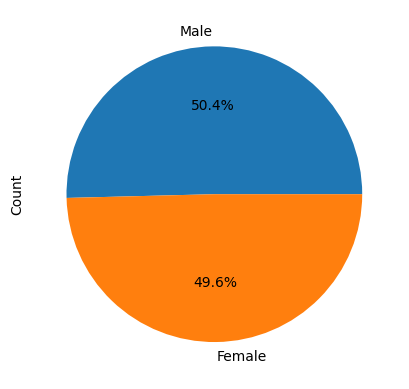

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels=gender.index

# Make the pie chart
plt.pie(gender.values, labels=labels, autopct='%1.1f%%')
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_trial=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
relevant_trial_df=ratatouille_df[ratatouille_df['Drug Regimen'].isin(drugs_trial)]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=relevant_trial_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume=greatest_timepoint.merge(ratatouille_df, on=['Mouse ID', 'Timepoint'],how='left')

In [21]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs_trial:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    medication= final_volume.loc[final_volume['Drug Regimen']== drug, 'Tumor Volume (mm3)']

    # add subset
    quants= medication.quantile([0.25, 0.5, 0.75])
    iqr= quants[0.75]- quants[0.25]
    # Determine outliers using upper and lower bounds
    lower=quants[0.25]-(1.5*iqr)
    upper=quants[0.75]+(1.5*iqr)
    
    outies= medication.loc[(medication<lower)| (medication>upper)]
    
    print(f"{drug}'s potential outliers: {outies}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


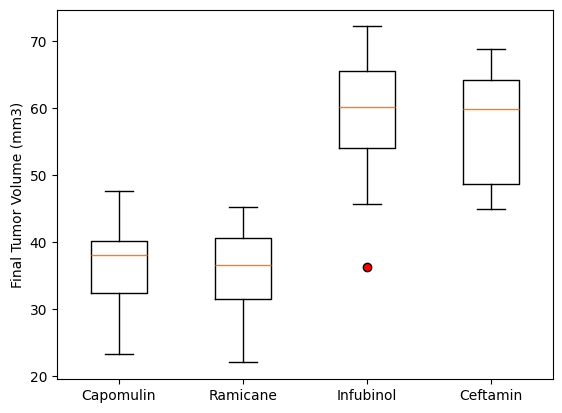

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_type=[final_volume.loc[final_volume['Drug Regimen']== drug, 'Tumor Volume (mm3)'] for drug in drugs_trial]

box= plt.boxplot(treatment_type, tick_labels=drugs_trial, flierprops=dict(markerfacecolor='red'))

plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

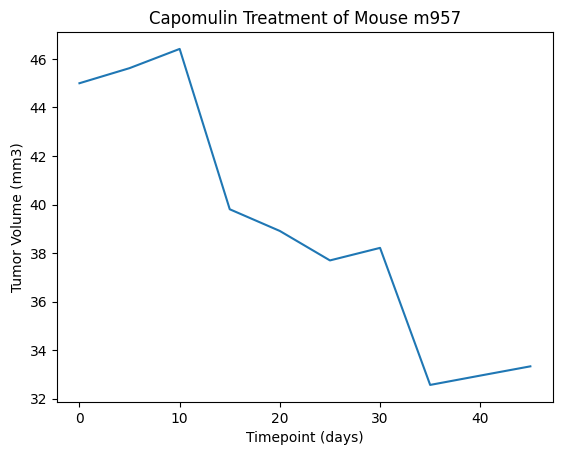

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse=relevant_trial_df.loc[relevant_trial_df["Drug Regimen"]=='Capomulin']['Mouse ID'].iloc[22]
loc_22=relevant_trial_df[relevant_trial_df['Mouse ID']== capomulin_mouse]
plt.plot(loc_22['Timepoint'], loc_22['Tumor Volume (mm3)'])
plt.title(f"Capomulin Treatment of Mouse {capomulin_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

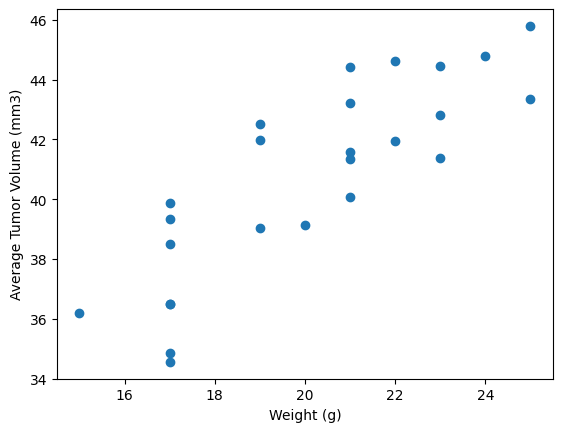

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regiment= relevant_trial_df[relevant_trial_df['Drug Regimen']== 'Capomulin']

avg_vol= capomulin_regiment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

just_how_little=capomulin_regiment.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Weight (g)']]
is_stuart_little=pd.merge(just_how_little, avg_vol, on='Mouse ID')

plt.scatter(is_stuart_little['Weight (g)'], is_stuart_little['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


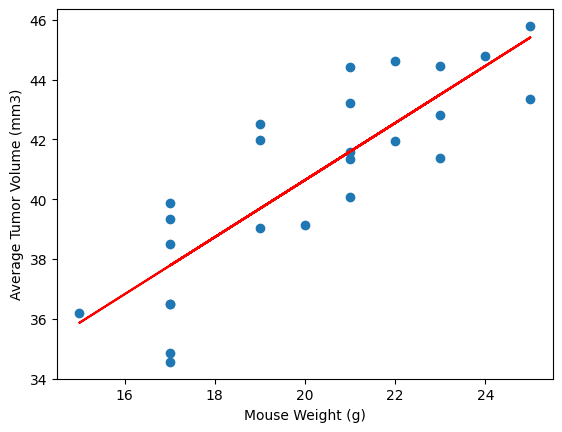

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation= is_stuart_little['Weight (g)'].corr(is_stuart_little['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
slope, intercept, r_value, p_value, std_err=st.linregress(is_stuart_little['Weight (g)'], is_stuart_little['Tumor Volume (mm3)'])
regress=slope*is_stuart_little['Weight (g)']+intercept
plt.scatter(is_stuart_little['Weight (g)'], is_stuart_little['Tumor Volume (mm3)'])
plt.plot(is_stuart_little['Weight (g)'], regress, color='r')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()